In [7]:
import sys

sys.path.append("../../src/stong_core_cython")

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hartree_fock
import basis_data
import importlib
from scipy.constants import physical_constants
from scipy.optimize import minimize

importlib.reload(hartree_fock)
importlib.reload(basis_data)

from atom import *
from hartree_fock import *
from basis_data import *

In [9]:
df = pd.read_csv("../make_base/sto_3g.csv")

H2のエネルギーの結合長依存性

In [10]:
def solve(r, zetas):
    atoms = [Atom("H", np.array([0.0, 0.0, 0.0])), Atom("H", np.array([r, 0.0, 0.0]))]
    molecule = Molecule(atoms)
    basis_data = {"H": create_basis_data(df, zetas, 2, 1)}
    hartreefock = HartreeFock(molecule, basis_data, max_iter=10000, tol=1e-10)
    hartreefock.scf()
    hartreefock.calculate_total_energy()
    results = hartreefock.get_results()
    return results, hartreefock


def get_energy(r, zetas):
    results, _ = solve(r, zetas)
    return results["energy"] + 1 / r

In [11]:
df_zetas = pd.read_csv("zetas.csv")

In [12]:
rs = np.linspace(0.5, 6.0, 100)
energies = []
for i, r in enumerate(rs):
    if i % 10 == 0:
        print(r)
    energies.append(get_energy(r, df_zetas["H"]))

0.5
1.0555555555555556
1.6111111111111112
2.1666666666666665
2.7222222222222223
3.2777777777777777
3.833333333333333
4.388888888888889
4.944444444444445
5.5


H原子のエネルギー

In [19]:
def solve_H(zetas):
    atoms = [Atom("H", np.array([0.0, 0.0, 0.0]))]
    molecule = Molecule(atoms)
    basis_data = {"H": create_basis_data(df, zetas, 2, 1)}
    hartreefock = HartreeFock(molecule, basis_data, max_iter=10000, tol=1e-10)
    hartreefock.scf()
    hartreefock.calculate_total_energy()
    results = hartreefock.get_results()
    return results, hartreefock


results_H, _ = solve_H(df_zetas["H"])

-0.4966460889612529

H2の結合解離曲線

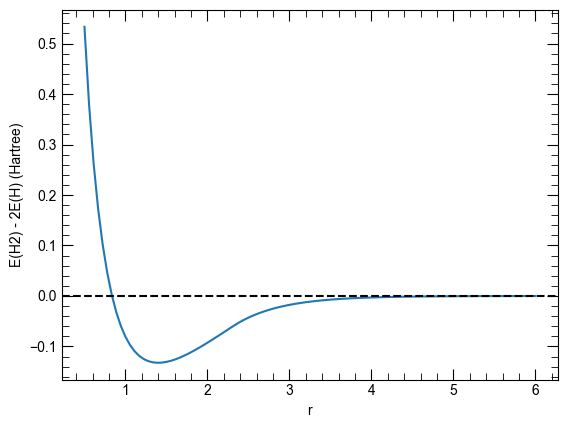

In [23]:
fig, ax = plt.subplots()
ax.plot(rs, np.array(energies) - 2 * results_H["energy"])
ax.axhline(0, color="black", linestyle="--")
ax.set_xlabel("r")
ax.set_ylabel("E(H2) - 2E(H) (Hartree)")
plt.show()